In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,  transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [18]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.pad1 = nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(1, 6, 5, bias = False)
        self.conv2 = nn.Conv2d(6, 16, 5, bias = False)
        self.conv3 = nn.Conv2d(16, 120, 5, bias = False)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pad1(x)
        x = F.avg_pool2d(F.relu(self.conv1(x)), 2)
        x = F.avg_pool2d(F.relu(self.conv2(x)), 2)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 120)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.log_softmax(x, dim = 1)
        return x
    

In [19]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(device)

cpu


In [20]:
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [21]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


In [22]:
for i, data in enumerate(trainloader):
    inputs, labels = data
    print(inputs.shape)
    break

torch.Size([4, 1, 28, 28])


In [23]:
model.train()
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if(i%2000 ==1999):
            print('[%d %5d] loss: %.7f' % (epoch+1, i+1, running_loss/2000))
        running_loss = 0.0    
        
print('Finished Training')

[1  2000] loss: 0.0001917
[1  4000] loss: 0.0000634
[1  6000] loss: 0.0001461
[1  8000] loss: 0.0000000
[1 10000] loss: 0.0000001
[1 12000] loss: 0.0000003
[1 14000] loss: 0.0000147
[2  2000] loss: 0.0000000
[2  4000] loss: 0.0000000
[2  6000] loss: 0.0000002
[2  8000] loss: 0.0000629
[2 10000] loss: 0.0000006
[2 12000] loss: 0.0000001
[2 14000] loss: 0.0000003
Finished Training


In [24]:
model.eval()
class_correct = list( 0.0 for i in range(10))
class_total = list(0.0 for i in range(10))
correct = 0.0
total = 0.0


with torch.no_grad():
  for data in testloader:
    input, labels = data
    output_raw = model(input)
    output = torch.argmax(output_raw,1)
    c = (output == labels)
    
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
      correct += c[i].item()
      total +=1
      

for i in range(10):
    print('Accuracy of %1d : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))
    
print ('accuracy of test set is %2.2f %%' % (correct/total*100))

Accuracy of 0 : 98 %
Accuracy of 1 : 98 %
Accuracy of 2 : 96 %
Accuracy of 3 : 96 %
Accuracy of 4 : 94 %
Accuracy of 5 : 95 %
Accuracy of 6 : 97 %
Accuracy of 7 : 97 %
Accuracy of 8 : 95 %
Accuracy of 9 : 94 %
accuracy of test set is 96.57 %


In [25]:
def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [26]:
dataiter = iter(testloader)

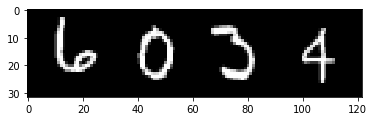

tensor([6, 0, 3, 4])
tensor([[-2.3083e+02, -2.1052e+02, -2.0586e+02, -3.3400e+02, -1.8890e+02,
         -2.1470e+02,  0.0000e+00, -3.4939e+02, -2.2448e+02, -3.1782e+02],
        [ 0.0000e+00, -7.1155e+01, -3.0598e+01, -1.1237e+02, -4.0471e+01,
         -9.2396e+01, -2.2262e+01, -4.4681e+01, -2.8259e+01, -3.0956e+01],
        [-5.1855e+01, -2.8720e+01, -1.3549e+01, -3.8147e-05, -3.4353e+01,
         -2.7036e+01, -5.6658e+01, -2.1905e+01, -1.0211e+01, -2.8754e+01],
        [-4.6931e+01, -4.3650e+01, -2.4516e+01, -7.8368e+01,  0.0000e+00,
         -5.5987e+01, -3.1546e+01, -3.7364e+01, -2.5911e+01, -2.3235e+01]],
       grad_fn=<LogSoftmaxBackward>)
tensor([6, 0, 3, 4])
tensor([1, 1, 1, 1], dtype=torch.uint8)


In [77]:
input, labels = dataiter.next()
imshow(torchvision.utils.make_grid(input))
print(labels)
print
output = model(input)
print(output)

out = torch.argmax(output, 1)
print(out)

print(out == labels)